# Least Squares Classifier


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=3)

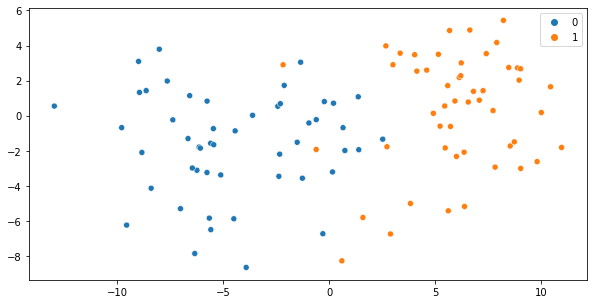

In [3]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

### Plot the Decision Region

In [10]:
def plot_decision_region(X, model, ax=None, title=''):

    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.01)
    x2grid = np.arange(min2, max2, 0.01)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    yhat = model.predict(grid)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape) 
    # plot the grid of x, y and z values as a surface
    if ax:
        ax.contourf(xx, yy, zz, cmap='Blues_r')
        ax.set_title(title)
    else:
        plt.figure(figsize=(10, 5))
        plt.title(title)
        plt.contourf(xx, yy, zz, cmap='Blues_r')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        if ax:
            ax.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
        else:
            plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
            
    if ax: return ax
    plt.show()

### Least Squares Classifier

In [11]:
class Least_Squares_Classifier:
    
    def __init__(self, basis=None, scale=True, degree=None, b_mu=None, b_s=None):
        self.basis = basis
        self.scale = scale
        self.degree = degree
        self.b_mu = b_mu
        self.b_s = b_s

    def one_of_K_coding(self, y):
        ys = len(np.unique(y))
        N = len(y)
        y_encoded = np.zeros((N, ys))
        for i in range(N):
            y_encoded[i][y[i]] = 1
        return y_encoded
    
    def _scale_fit(self, X, L=-1, H=1):
        P = X.shape[1]
        self.a = []; self.b = []
        for p in range(P):
            self.a.append(((H * min(X[:, p])) - (L * max(X[:, p])))/(H-L))
            self.b.append((max(X[:, p]) - min(X[:, p]))/(H - L))

    def _scale_transform(self, X):
        X_scaled = (X - self.a)/self.b
        return X_scaled.reshape(X.shape[0], -1)
    
    def _scale_inverse(X):
        return (X * self.b) + self.a
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        
        if self.scale:
            self._scale_fit(X)
            X = self._scale_transform(X)
        
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        
        y = y.reshape(-1, 1)
        self.y = self.one_of_K_coding(y)
        
        self.w = np.linalg.pinv(X).dot( self.y)

    def predict(self, X:np.ndarray):
        if self.scale:
            X = self._scale_transform(X)
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        return np.argmax(X.dot(self.w), axis=-1)

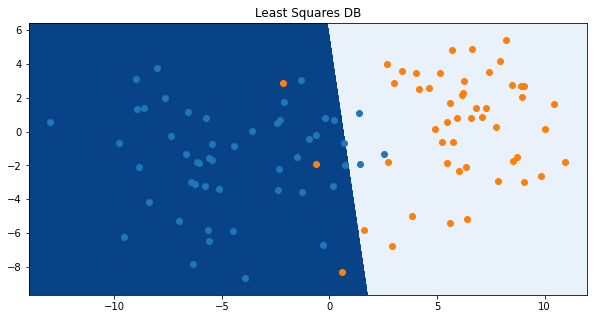

In [13]:
model = Least_Squares_Classifier()
model.fit(X, y)
plot_decision_region(X, model, None, 'Least Squares DB')